In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils
pd.set_option('display.max_rows', 6)
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

In [2]:
df = utils.load_sweeps(['gpt2s_adam_2d_1'])

len(sweeps)=1


In [3]:
# check that the sweep was loaded correctly
df['opt.batch_size'].value_counts()

opt.batch_size
512    156
1      156
Name: count, dtype: int64

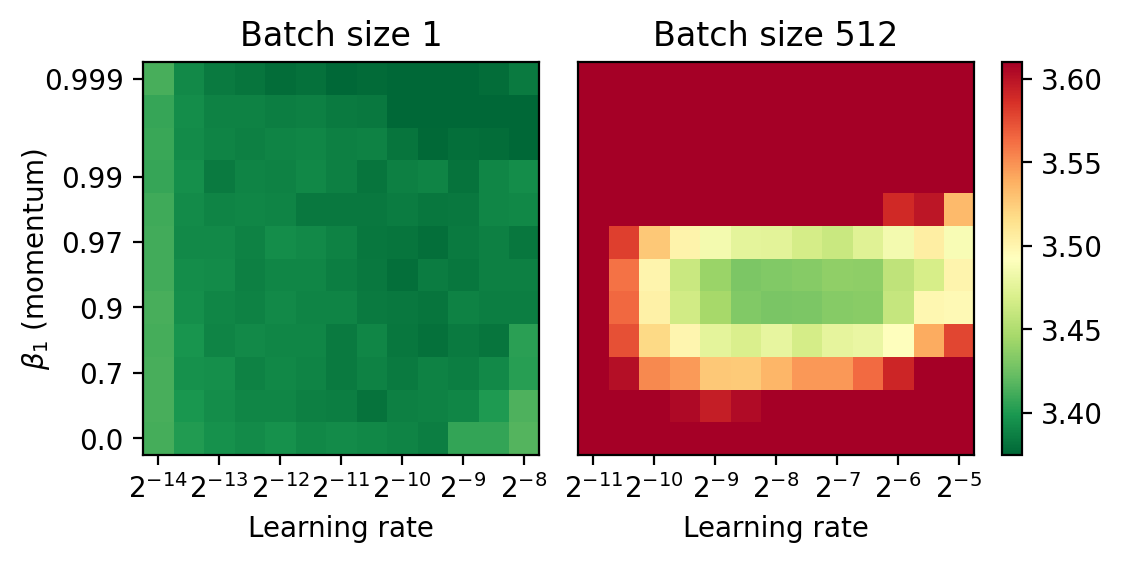

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(5.5, 2.7), layout='constrained')
b1s = np.sort(df['opt.b1'].unique())

batch_sizes = np.sort(df['opt.batch_size'].unique())
for ax, bs in zip(axs, batch_sizes):
    df_bs = df[df['opt.batch_size'] == bs]
    lrs = np.sort(df_bs['opt.peak_lr'].unique())
    df_bs = df_bs.groupby(['opt.peak_lr', 'opt.b1']).mean('eval_loss')
    
    # m = df_bs['eval_loss'].to_numpy().reshape([len(lrs), len(b1s)])
    m = np.zeros([len(lrs), len(b1s)])
    for i, lr in enumerate(lrs):
        for j, b1 in enumerate(b1s):
            m[i, j] = df_bs.loc[lr, b1]['eval_loss']
    
    im = ax.imshow(m.T, cmap='RdYlGn_r', vmin=3.375, vmax=3.61, aspect='auto', origin='lower')
    ax.set_xlabel('Learning rate')
    pows = np.log2(lrs).astype(np.int32)
    ax.set_xticks([0, 2, 4, 6, 8, 10, 12], [f'$2^{{{i}}}$' for i in pows[::2]])
    ax.set_xticks([sub*2**i for i in range(9) for sub in [1.5, 1.75]], ['' for i in range(2*9)], minor=True)
    ax.set_title(f'Batch size {bs}')

# y ticks
b1s_rounded = np.array([0., 0.5, 0.7, 0.82, 0.9, 0.94, 0.97, 0.98, 0.99, 0.995, 0.997, 0.999])
bs1_show = [0, 2, 4, 6, 8, 11]
axs[0].set_yticks(bs1_show, b1s_rounded[bs1_show])
axs[1].set_yticks([])

cbar = fig.colorbar(im, ax=axs[-1], format=lambda x, _: f'{x:.2f}')
axs[0].set_ylabel(r'$\beta_1$ (momentum)', labelpad=-3)
# plt.savefig('plots/gpt2s_adam_sensitivity_2d_image.pdf', dpi=300)
plt.show()